In [57]:
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

DPi = 350


# Tarefa 1 - ACD

## ITEM 1

In [78]:
rules = list(range(256))

def plot_automata(rule, initial_state):
    data = np.loadtxt("saidas/tarefa-1/rule-" + str(rule) + "-" + str(initial_state)  +".dat")
    
    cmap = plt.cm.colors.ListedColormap(['white', 'black'])
    bounds = [0, 0.5, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.matshow(data, cmap=cmap, norm=norm)
  
    # Grid
    [ax.axhline(i-0.5, color='lightgray', linewidth=0.8) for i in range(len(data))]
    [ax.axvline(i-0.5, color="lightgray", linewidth=0.8) for i in range(len(data[0]))]

  
    ax.axis('off') 
    plt.savefig("../relatorio/graficos/tarefa-1/rule-"+str(rule)+"-" + str(initial_state) + ".png", dpi=200, bbox_inches='tight')
  #  plt.show()


def plot_automata_positioned(rule, pos):
    data = np.loadtxt("saidas/tarefa-1/all-the-rules/rule-" + str(rule) + "-" +  pos + ".dat")
    
    # Grid
    # [ax.axhline(i-0.5, color='lightgray', linewidth=0.8) for i in range(len(data))]
    # [ax.axvline(i-0.5, color="lightgray", linewidth=0.8) for i in range(len(data[0]))]
   
    cmap = plt.cm.colors.ListedColormap(['white', 'black'])
    bounds = [0, 0.5, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.matshow(data, cmap=cmap, norm=norm)

    ax.axis('off') 
    plt.savefig("../relatorio/graficos/tarefa-1/all-the-rules/rule-"+str(rule)+"-" + pos + ".png", dpi=300, bbox_inches='tight')
    # plt.show()

In [65]:
# rules = list(range(256))
# for rule in rules:
#    print("Rule = ", rule)
#    plot_automata_positioned(rule, "centered")
#    plot_automata_positioned(rule, "last")

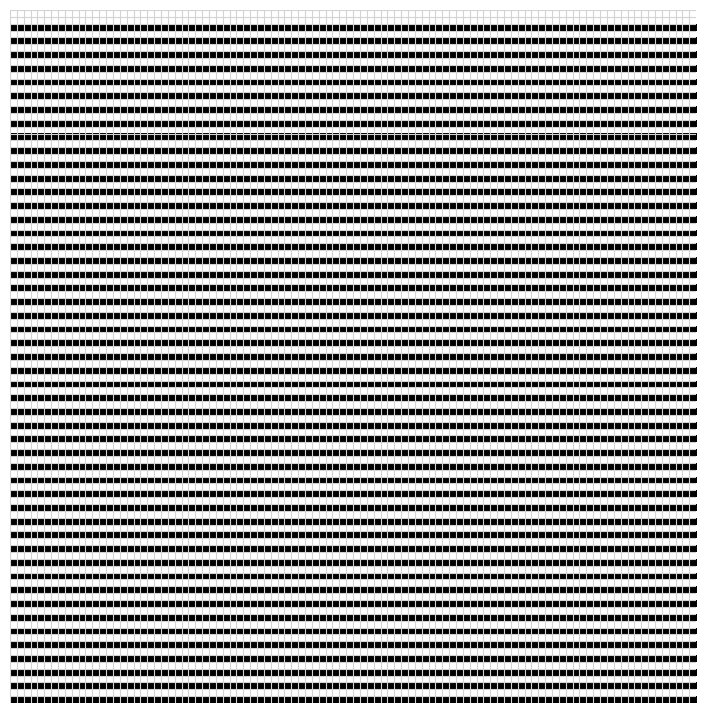

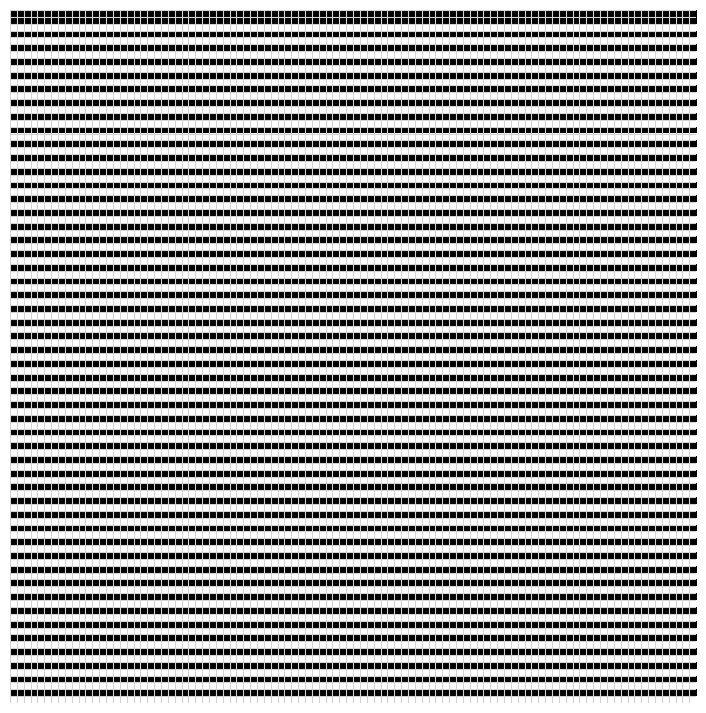

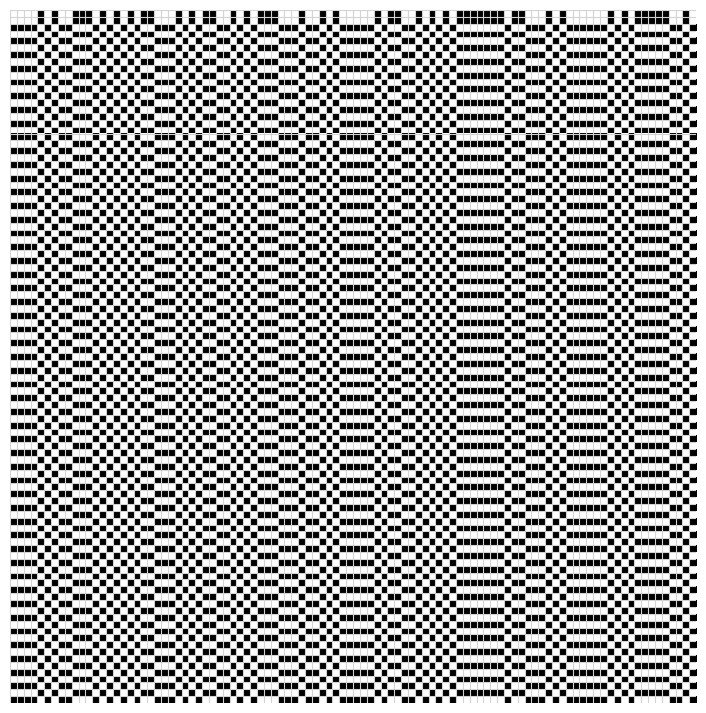

In [79]:
plot_automata(51, 0)
plot_automata(51, 1)
plot_automata(51, 2)

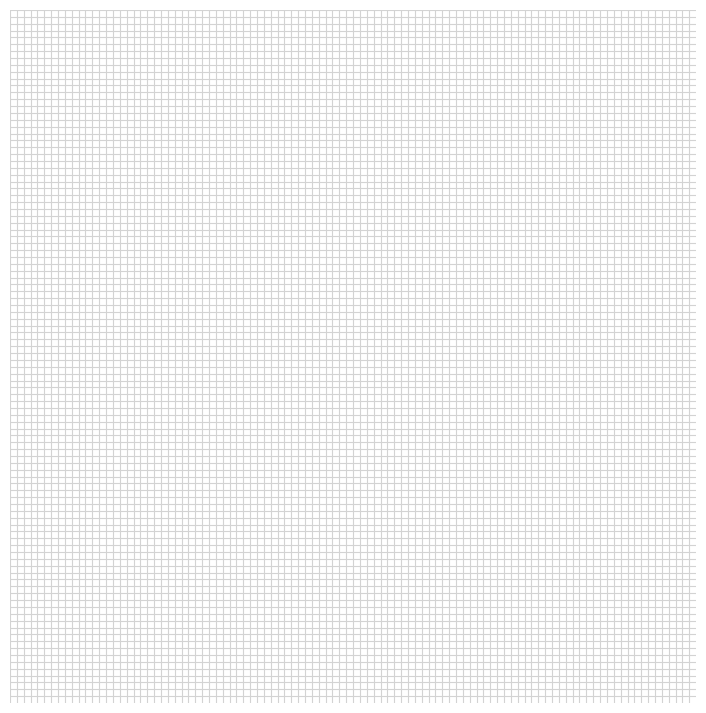

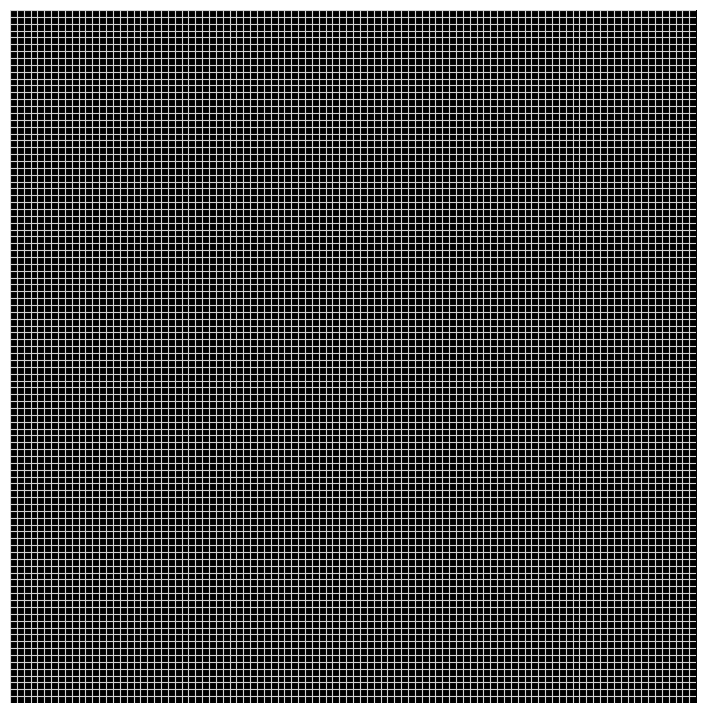

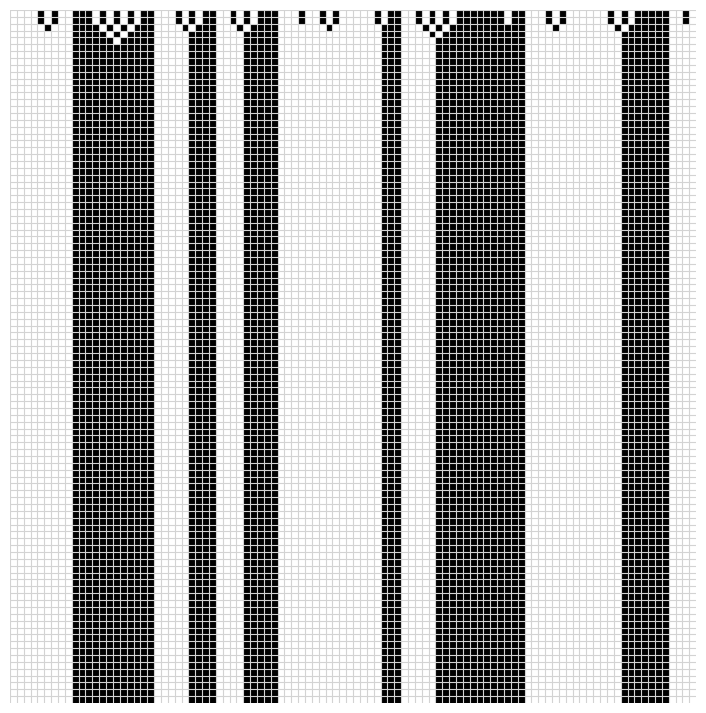

In [80]:
plot_automata(232, 0)
plot_automata(232, 1)
plot_automata(232, 2)

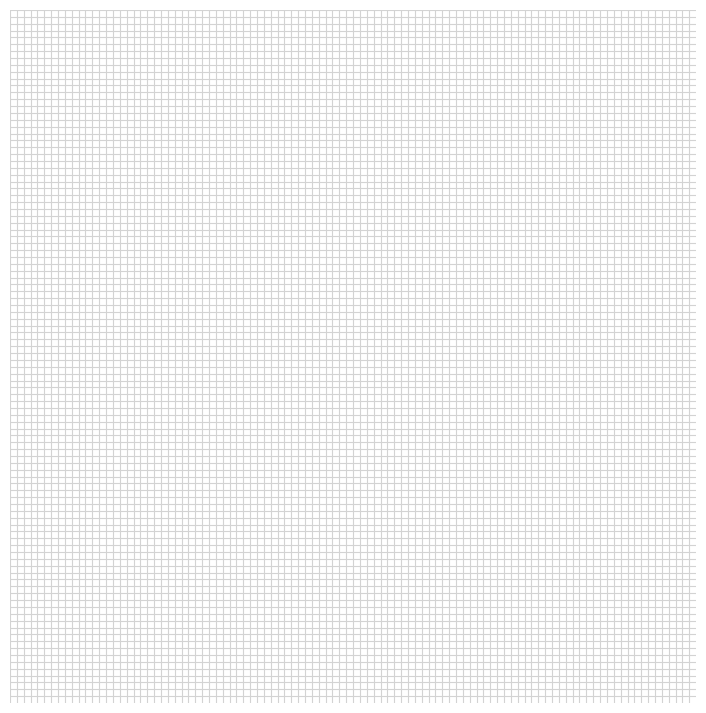

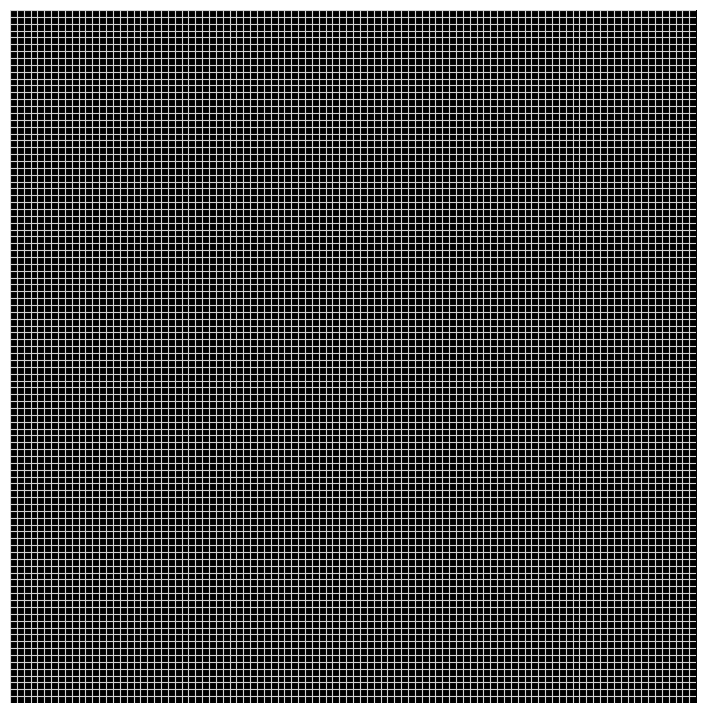

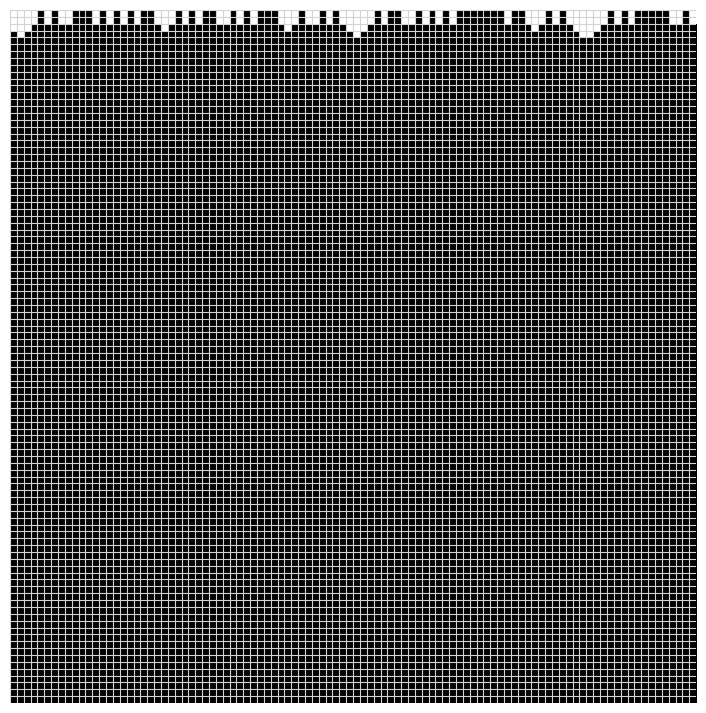

In [81]:
plot_automata(254, 0)
plot_automata(254, 1)
plot_automata(254, 2)

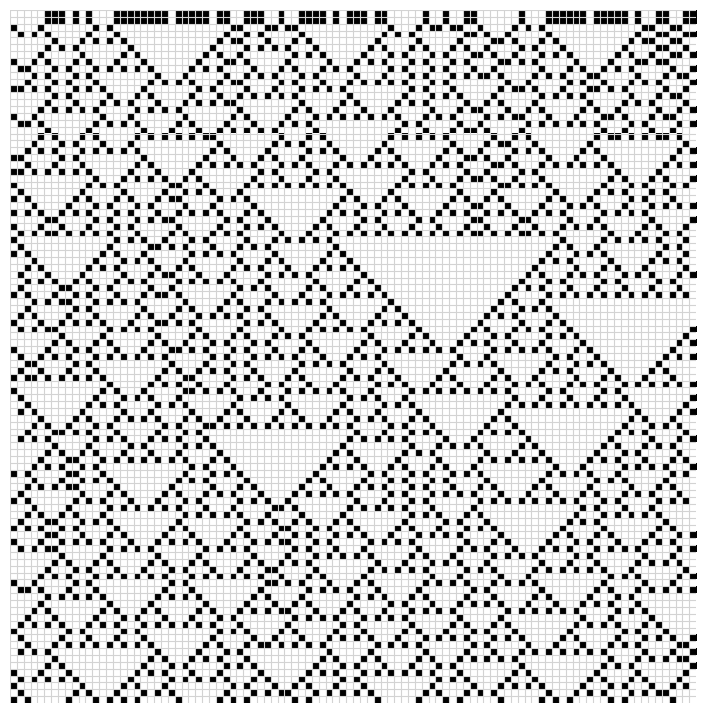

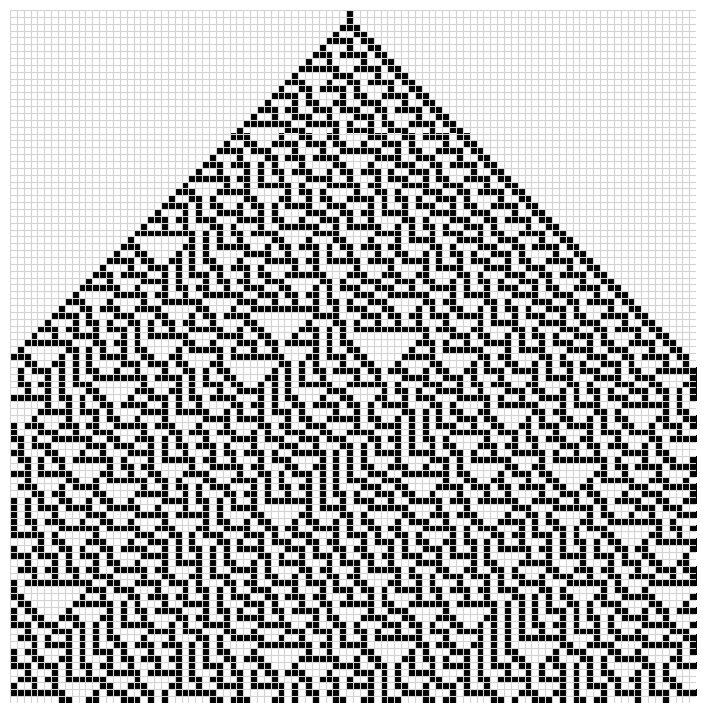

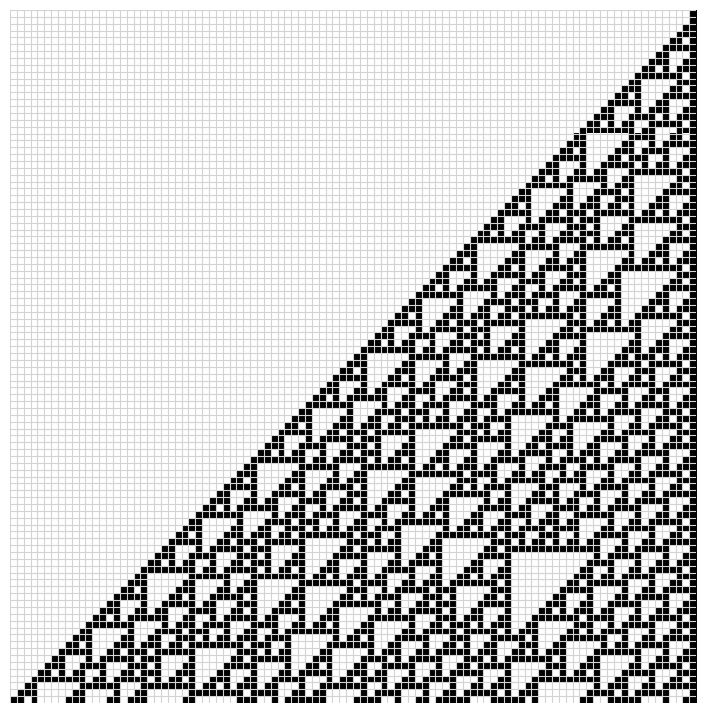

In [83]:
plot_automata(18, 0)
plot_automata(86, 0)
plot_automata(110, 0)

# Tarefa 2 - DLA 2D 

## DLA 2D plots

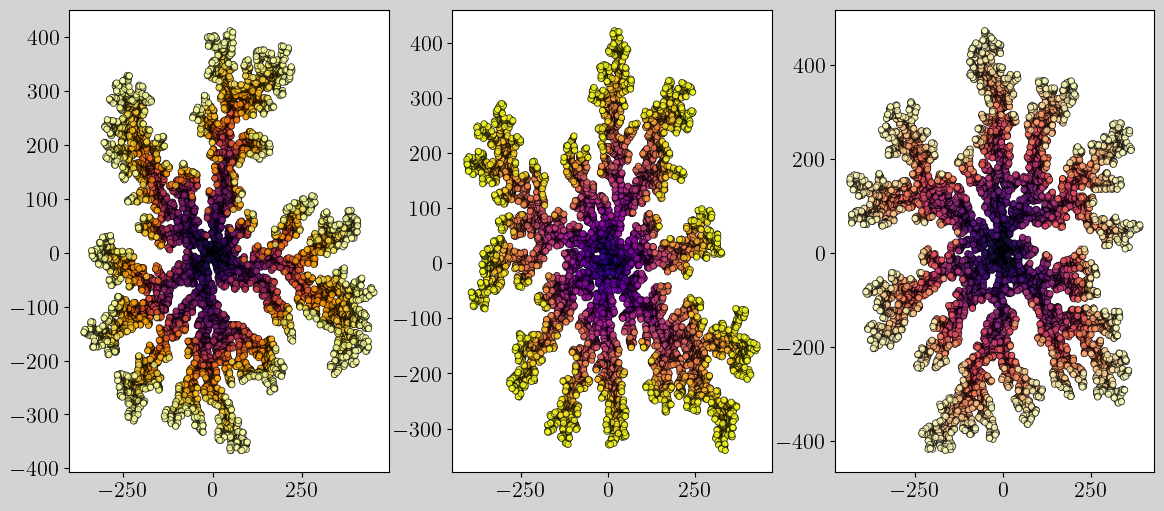

In [48]:
from functions import *

path = "./saidas/tarefa-2/DLA_2D-"
fn = [169, 255, 954]
files = [path+str(i)+".dat" for i in fn]

x = []
y = []
r = []
for path in files:
    data = np.loadtxt(path)
    x_tmp = np.array(data[:, 0])
    y_tmp = np.array(data[:, 1])
    r_tmp = np.array(data[:, 2]) 

    x.append(x_tmp)
    y.append(y_tmp)
    r.append(r_tmp)

for i in range(len(r)):
    r[i]  = (r[i] - np.min(r[i])) / (np.max(r[i]) - np.min(r[i]))


font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 


fig, ax = plt.subplots(1, 3, figsize=(14, 6), facecolor='lightgrey')

ax[0].set_aspect(aspect = 'auto', adjustable='box')
ax[1].set_aspect(aspect = 'auto', adjustable='box')
ax[2].set_aspect(aspect = 'auto', adjustable='box')


ax[0].scatter(x[0], y[0], c=r[0], cmap='inferno',edgecolors='black', linewidths=0.5, s=20, alpha=0.75)
ax[1].scatter(x[1], y[1], c=r[1], cmap='plasma', edgecolors='black', linewidths=0.5, s=20, alpha=0.75)
ax[2].scatter(x[2], y[2], c=r[2], cmap='magma',  edgecolors='black', linewidths=0.5, s=20, alpha=0.75)


plt.savefig("DLA_2D-graf.png", dpi = DPi, bbox_inches='tight')
plt.show()

## Fractal dimension plots

In [6]:
path = "./saidas/tarefa-2/DLA_2D-"
fn = [169, 255, 954]
files = [path+str(i)+"-dimensao.dat" for i in fn]
print(files)

r = []
Nr = []
for file in files:
    r.append(np.loadtxt(file)[:, 0])
    Nr.append(np.loadtxt(file)[:, 1])

['./saidas/tarefa-2/DLA_2D-169-dimensao.dat', './saidas/tarefa-2/DLA_2D-255-dimensao.dat', './saidas/tarefa-2/DLA_2D-954-dimensao.dat']


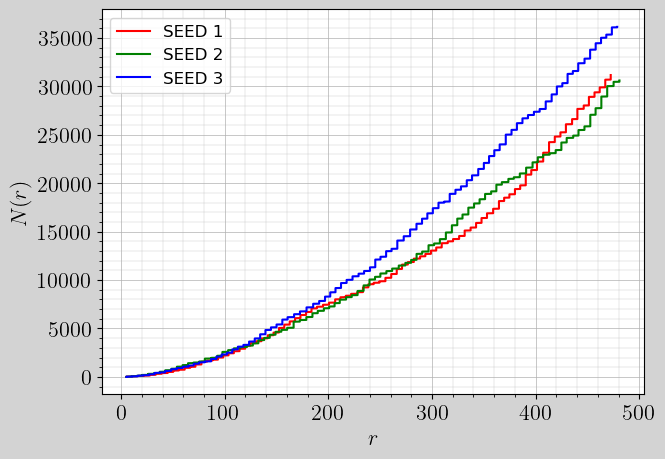

In [8]:
fig, ax = plt.subplots(1,1, figsize=(7, 5), facecolor = 'lightgrey')

plt.style.use('default')

plt.plot(r[0], Nr[0], c="red",   markersize=1.5, label = "SEED 1")
plt.plot(r[1], Nr[1], c="green", markersize=1.5, label = "SEED 2")
plt.plot(r[2], Nr[2], c="blue",  markersize=1.5, label = "SEED 3")

plt.legend(fontsize=12)

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 


plt.xlabel('$r$')
plt.ylabel('$N(r)$')

ax.grid(which = "major", linewidth = 0.5)
ax.grid(which = "minor", linewidth = 0.2)
ax.minorticks_on()

plt.savefig("grafico-pontos-raio.png", dpi=DPi, bbox_inches='tight')
plt.show()

In [9]:
x0, y0 = linear_reg(r[0], Nr[0])
x1, y1 = linear_reg(r[1], Nr[1])
x2, y2 = linear_reg(r[2], Nr[2])

Angular coefficient (slope): 1.699552493364568
Intercept =  -0.17136634732773554
Angular coefficient (slope): 1.6262432548573096
Intercept =  0.26488835285185597
Angular coefficient (slope): 1.756439063337848
Intercept =  -0.29582126907140005


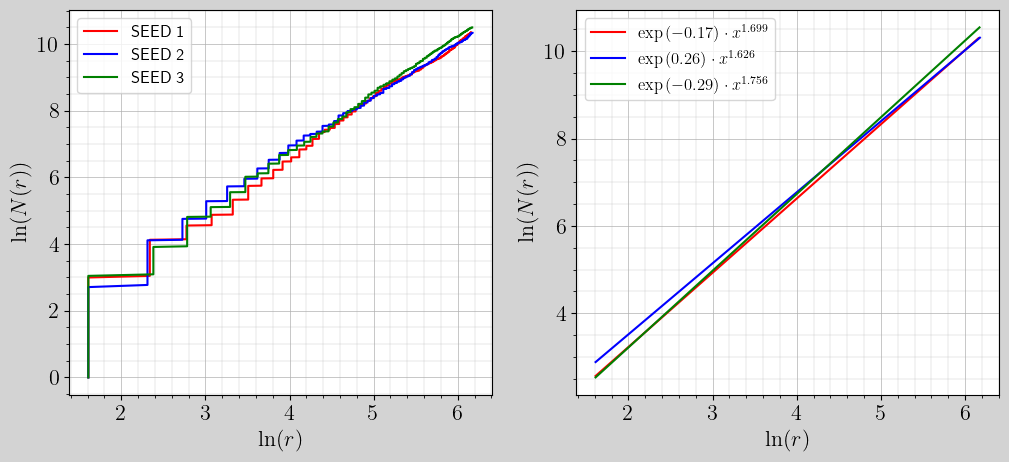

In [10]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5), facecolor='lightgrey')

plt.style.use('default')


font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 


ax[0].plot(np.log(r[0]), np.log(Nr[0]), c="red",   markersize=1.5, label="SEED 1")
ax[0].plot(np.log(r[1]), np.log(Nr[1]), c="blue",  markersize=1.5, label="SEED 2")
ax[0].plot(np.log(r[2]), np.log(Nr[2]), c="green", markersize=1.5, label="SEED 3")


ax[0].set_xlabel('$\\ln(r)$')
ax[0].set_ylabel('$\\ln(N(r))$')


ax[0].grid(which="major", linewidth=0.5)
ax[0].grid(which="minor", linewidth=0.2)
ax[0].minorticks_on()
ax[0].legend(fontsize=12)



ax[1].plot(x0, y0, color = "red", label = "$\\exp{(-0.17)}\\cdot x^{1.699} $")
ax[1].plot(x1, y1, color = "blue", label = "$\\exp{(0.26)} \\cdot x^{1.626} $")
ax[1].plot(x2, y2, color = "green", label = "$\\exp{(-0.29)} \\cdot x^{1.756}$")


ax[1].set_xlabel('$\\ln(r)$')
ax[1].set_ylabel('$\\ln(N(r))$')


ax[1].grid(which="major", linewidth=0.5)
ax[1].grid(which="minor", linewidth=0.2)
ax[1].minorticks_on()

ax[1].legend(fontsize=12)

plt.savefig("regressao-linear-dimensao-fractal.png", dpi=DPi, bbox_inches='tight')
plt.show()

# Tarefa 3 - DLA 3D


## Random walk 3D Plots - figura de exemplo

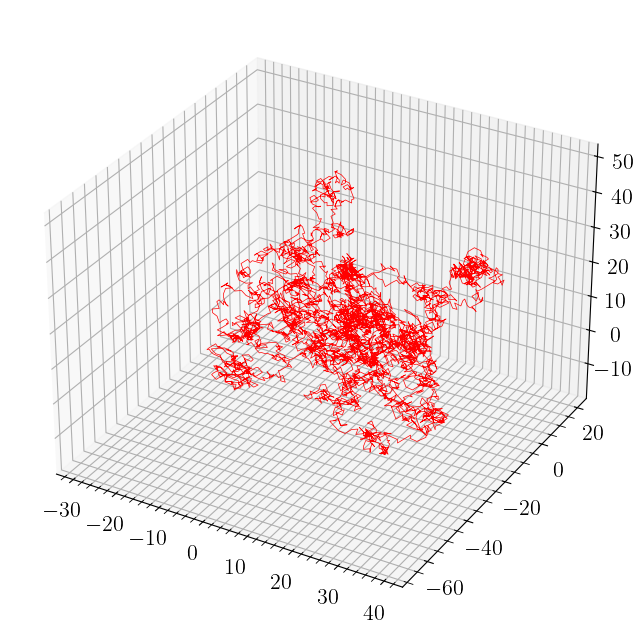

In [11]:
data = np.loadtxt("./saidas/tarefa-3/random_walk.dat")

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
plt.style.use('default')


font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 

ax.plot(x, y, z, c="red", marker='o', markersize=0.01, linewidth=0.5, linestyle='-')
ax.minorticks_on()
ax.grid(which='both', linewidth=0.5)
plt.style.use('default')

plt.savefig("./exemplo-random-walk-3D.png", dpi=DPi, bbox_inches='tight')
plt.show()

## DLA 3D - Plots

['./saidas/tarefa-3/DLA_3D-51.dat', './saidas/tarefa-3/DLA_3D-255.dat', './saidas/tarefa-3/DLA_3D-729.dat']


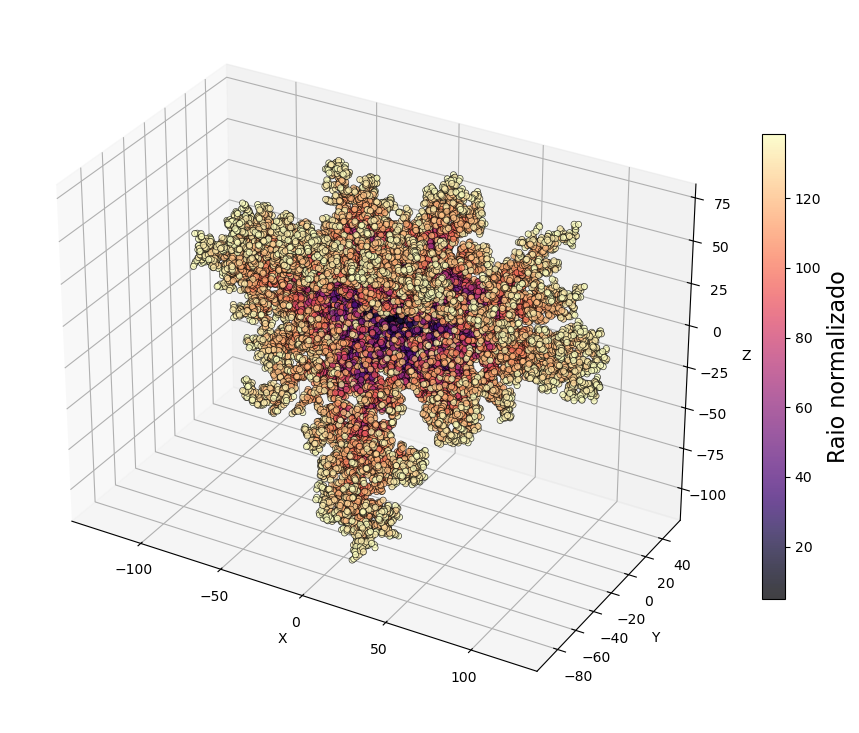

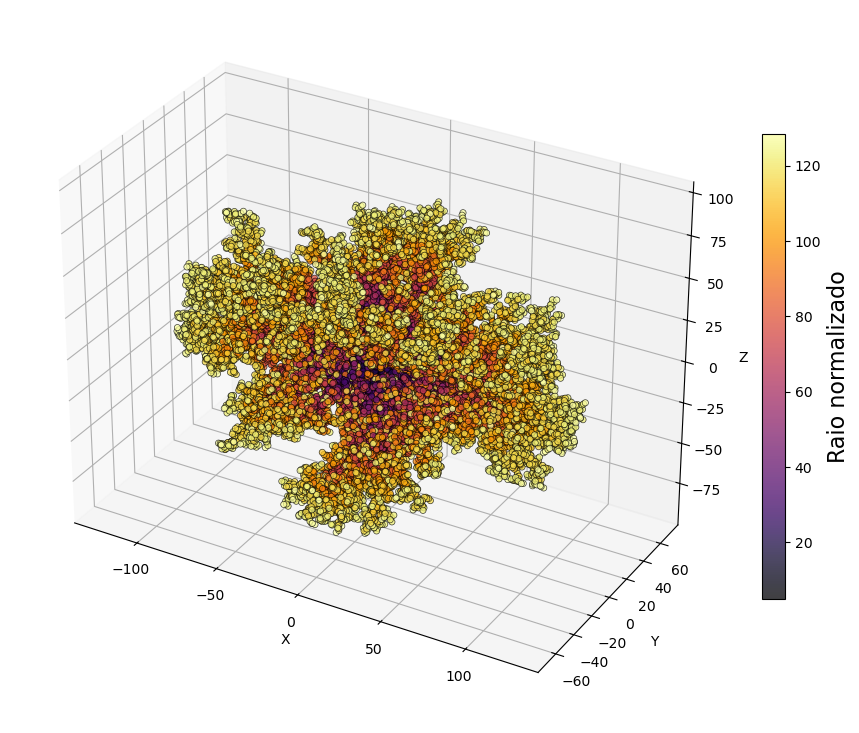

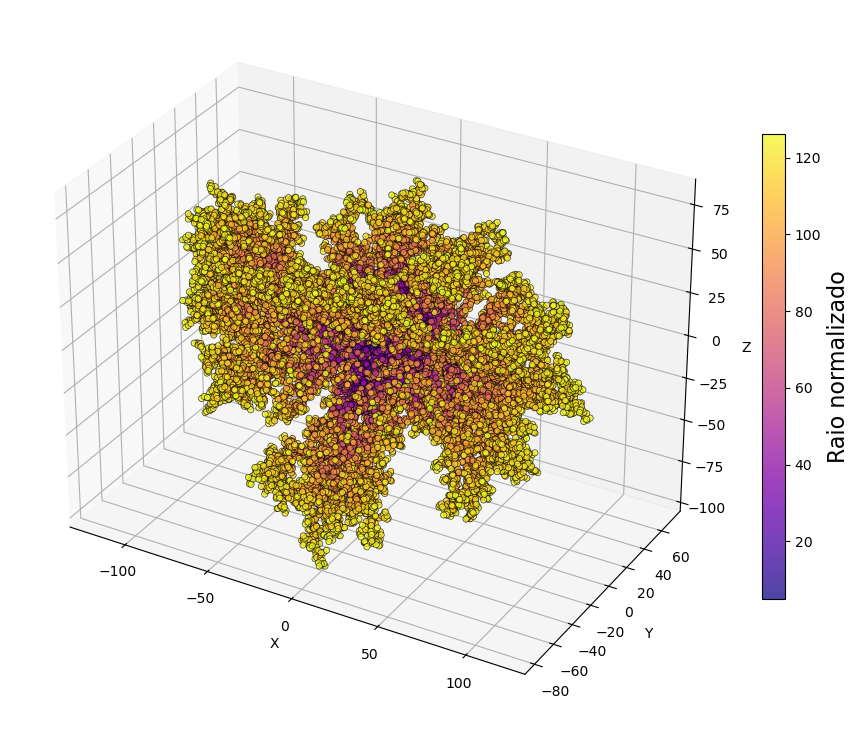

In [84]:

def plot_dla3d(path, theme):
    data = np.loadtxt(path)

    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]
    r = data[:, 3]

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    font = {
            'weight' : 'bold',
            'size'   : 16}
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
    plt.rc('font', **font) 

    scatter = ax.scatter(x, y, z, c=r, cmap = theme, edgecolors='black', linewidths=0.5, s=20, alpha=0.75)

    # Set the title and axis labels
    # ax.set_title('DLA 3D', fontsize = 16)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set the aspect ratio and background style
    ax.set_box_aspect([np.ptp(x), np.ptp(y), np.ptp(z)])
    plt.style.use('default') # 'dark_background')


    # Add colorbar
    cbar = plt.colorbar(scatter, fraction=0.03)
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label('Raio normalizado', fontsize=16)
    
    return plt

path = "./saidas/tarefa-3/DLA_3D-"
fn = [51, 255, 729]
files = [path+str(i)+".dat" for i in fn]
print(files)

i = 1
themes = ["magma", "inferno", "plasma"]
for path, theme in zip(files, themes):
    figure = plot_dla3d(path, theme)
    figure.savefig("DLA_3D-grafico-" + str(i)+".png", dpi=DPi, bbox_inches='tight')
    i += 1
    figure.show()

## Dimensão fractal

In [73]:
path = "./saidas/tarefa-3/DLA_3D-"
fn = [51, 255, 729]
files = [path+str(i)+"-dimensao.dat" for i in fn]
print(files)

r = []
Nr = []
for file in files:
    r.append(np.loadtxt(file)[:, 0])
    Nr.append(np.loadtxt(file)[:, 1])

['./saidas/tarefa-3/DLA_3D-51-dimensao.dat', './saidas/tarefa-3/DLA_3D-255-dimensao.dat', './saidas/tarefa-3/DLA_3D-729-dimensao.dat']


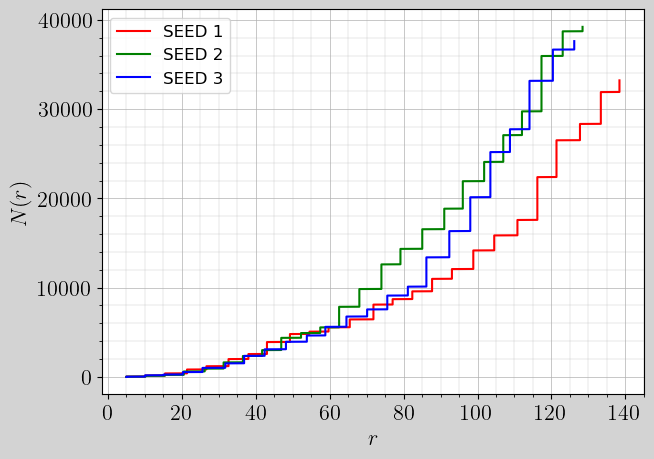

In [74]:
fig, ax = plt.subplots(1,1, figsize=(7, 5), facecolor = 'lightgrey')

plt.style.use('default')

plt.plot(r[0], Nr[0], c="red",   markersize=1.5, label = "SEED 1")
plt.plot(r[1], Nr[1], c="green", markersize=1.5, label = "SEED 2")
plt.plot(r[2], Nr[2], c="blue",  markersize=1.5, label = "SEED 3")

plt.legend(fontsize=12)

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 


plt.xlabel('$r$')
plt.ylabel('$N(r)$')

ax.grid(which = "major", linewidth = 0.5)
ax.grid(which = "minor", linewidth = 0.2)
ax.minorticks_on()

plt.savefig("grafico-pontos-raio.png", dpi=1200, bbox_inches='tight')
plt.show()

In [75]:
x0, y0 = linear_reg(r[0], Nr[0])
x1, y1 = linear_reg(r[1], Nr[1])
x2, y2 = linear_reg(r[2], Nr[2])

Angular coefficient (slope): 2.089627851066098
Intercept =  0.005001839741258932
Angular coefficient (slope): 2.4785757319963553
Intercept =  -1.400731158306447
Angular coefficient (slope): 2.4916387434876905
Intercept =  -1.5733255438454563


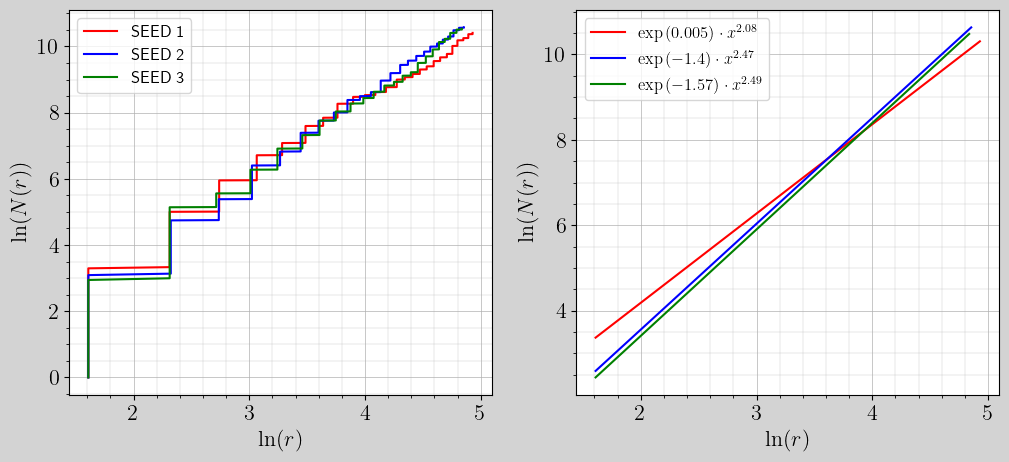

In [77]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5), facecolor='lightgrey')

plt.style.use('default')

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 


ax[0].plot(np.log(r[0]), np.log(Nr[0]), c="red",   markersize=1.5, label="SEED 1")
ax[0].plot(np.log(r[1]), np.log(Nr[1]), c="blue",  markersize=1.5, label="SEED 2")
ax[0].plot(np.log(r[2]), np.log(Nr[2]), c="green", markersize=1.5, label="SEED 3")

ax[0].set_xlabel('$\\ln(r)$')
ax[0].set_ylabel('$\\ln(N(r))$')

ax[0].grid(which="major", linewidth=0.5)
ax[0].grid(which="minor", linewidth=0.2)
ax[0].minorticks_on()
ax[0].legend(fontsize=12)

ax[1].plot(x0, y0, color = "red", label = "$\\exp{(0.005)}  \\cdot x^{2.08}$")
ax[1].plot(x1, y1, color = "blue", label = "$\\exp{(-1.4)}  \\cdot x^{2.47}$")
ax[1].plot(x2, y2, color = "green", label = "$\\exp{(-1.57)}\\cdot x^{2.49}$")


ax[1].set_xlabel('$\\ln(r)$')
ax[1].set_ylabel('$\\ln(N(r))$')

ax[1].grid(which="major", linewidth=0.5)
ax[1].grid(which="minor", linewidth=0.2)
ax[1].minorticks_on()

ax[1].legend(fontsize=12)

plt.savefig("regressao-linear-dimensao-fractal.png", dpi=1200, bbox_inches='tight')
plt.show()

# Tarefa 4 - Efeito corona



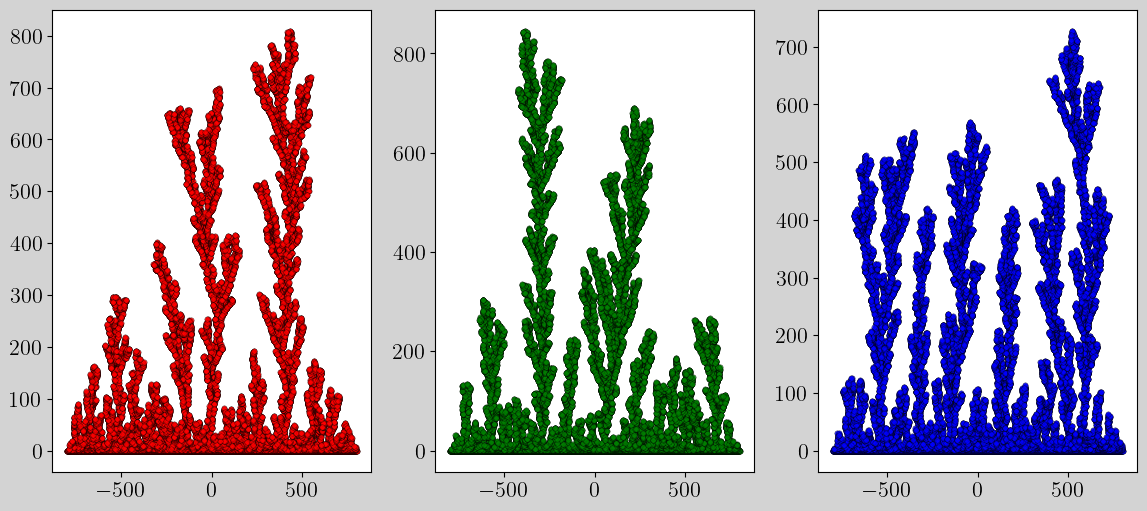

In [13]:

path = "./saidas/tarefa-4/efeito-corona-"
fn = [5429, 2837, 19238]
files = [path+str(i)+".dat" for i in fn]

x = []
y = []

for path in files:
    data = np.loadtxt(path)
    x_tmp = np.array(data[:, 0])
    y_tmp = np.array(data[:, 1])

    x.append(x_tmp)
    y.append(y_tmp)


font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 


fig, ax = plt.subplots(1, 3, figsize=(14, 6), facecolor='lightgrey')

ax[0].set_aspect(aspect = 'auto', adjustable='box')
ax[1].set_aspect(aspect = 'auto', adjustable='box')
ax[2].set_aspect(aspect = 'auto', adjustable='box')


ax[0].scatter(x[0], y[0], color = "red", edgecolors='black',   linewidths=0.3, s=15, alpha=0.75)
ax[1].scatter(x[1], y[1], color = "green", edgecolors='black', linewidths=0.3, s=15, alpha=0.75)
ax[2].scatter(x[2], y[2], color = "blue", edgecolors='black',  linewidths=0.3, s=15, alpha=0.75)


plt.savefig("efeito-corona.png", dpi = DPi, bbox_inches='tight')
plt.show()

# Tarefa 5 - Rev. populares

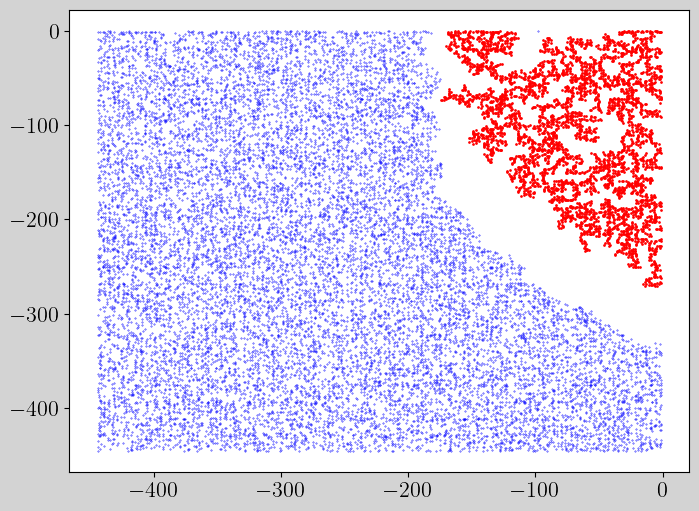

In [64]:
data1 = np.loadtxt("output-dynamics.dat")
data2 = np.loadtxt("output-static.dat")

x1 = data1[:, 0]
y1 = data1[:, 1]

x2 = data2[:, 0]
y2 = data2[:, 1]

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 


fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor='lightgrey')

ax.set_aspect(aspect = 'auto', adjustable='box')


ax.scatter(x1, y1, s = 0.9, color = "red") # , c=r, cmap='inferno',edgecolors='black', linewidths=0.5, s=20, alpha=0.75)
ax.scatter(x2, y2, s = 0.1, color = "blue")

plt.savefig("rev.png", dpi = DPi, bbox_inches='tight')
plt.show()


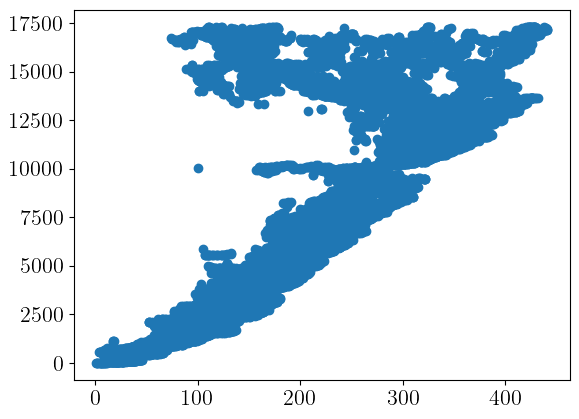

In [67]:
data = np.loadtxt("output-fractal.dat")

Nr = data[:, 0]
r = data[:, 1]



plt.scatter(r, Nr)

plt.show()

